<a href="https://colab.research.google.com/github/jefersonjlima/2dof-arm/blob/master/Robotic_Arm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Inverse Kinematics in a Robotic Arm


Kinematics is the science of motion. In a two-joint robotic arm, given the angles of the joints, the kinematics equations give the location of the tip of the arm. Inverse kinematics refers to the reverse process.

![](https://www.mathworks.com/help/examples/fuzzy/win64/invkine_codepad_01.png)

In [0]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pylab as plt

## Define Integration Method

The most widely known member of the Runge–Kutta family is generally referred to as "RK4", the "classic Runge–Kutta method" or simply as "the Runge–Kutta method". [<sup>1</sup>](https://codereview.stackexchange.com/questions/163499/ode45-solver-implementation-in-python)

In [0]:
def ode45_step(f, x, t, dt, *args):
    """
    One step of 4th Order Runge-Kutta method
    """
    k = dt
    k1 = k * f(t, x, *args)
    k2 = k * f(t + 0.5*k, x + 0.5*k1, *args)
    k3 = k * f(t + 0.5*k, x + 0.5*k2, *args)
    k4 = k * f(t + dt, x + k3, *args)
    return x + 1/6. * (k1 + 2*k2 + 2*k3 + k4)

def ode45(f, t, x0, *args):
    """
    4th Order Runge-Kutta method
    """
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        dt = t[i+1] - t[i] 
        x[i+1] = ode45_step(f, x[i], t[i], dt, *args)
    return x

# Model

In [0]:
# parameters
L1 = 1
L2 = 2
M1 = 1
M2 = 5
g = 0

def robot(t,X):
    '''
    2 DOF Robot Model
        q1 = theta1
        q2 = theta2
    '''
    # states
    q1  = X[0]
    q2  = X[1]
    dq1 = X[2] 
    dq2 = X[3]

    # Inertial matrix
    Bq = np.array([
                [(M1+M2)*L1**2+M2*L2**2+2*M2*L1*L2*np.cos(q2)  ,  M2*L2**2+M2*L1*L2*np.cos(q2)],
                [M2*L2**2+M2*L1*L2*np.cos(q2)                  , M2*L2**2]
                    ]) 
    # C Matrix
    Cq = np.array([
                    [-M2*L1*L2*np.sin(q2)*(2*dq1*dq2+dq2**2)],
                    [-M2*L1*L2*np.sin(q2)*dq1*dq2]
                    ])
    # Gravitation 
    Gq = np.array([
                    [-(M1+M2)*g*L1*np.sin(q1)-M2*g*L2*np.sin(q1+q2)],
                    [-M2*g*L2*np.sin(q1+q2)]
                   ])

    # Model
    xdot = np.zeros(4,)
    #dinamic
    q2dot = inv(Bq).dot(Cq-Gq)

    # states
    xdot[0] = dq1
    xdot[1] = dq2
    xdot[2] = q2dot[0]
    xdot[3] = q2dot[1]
    
    return xdot

# Simulation

In [0]:
# int
x0 = np.array([0.0, 0.0, 2.5, 2.5])
t0 = 0; tf = 15; steps = 10000

t = np.linspace(t0, tf, steps)
X = ode45(robot, t, x0)

In [0]:
# states
q1  = X[:,0]
q2  = X[:,1]
dq1 = X[:,2] 
dq2 = X[:,3]

# plot
x1=L1*np.sin(q1)
y1=L1*np.cos(q1)
x2=L1*np.sin(q1)+L2*np.sin(q1+q2)
y2=L1*np.cos(q1)+L2*np.cos(q1+q2)

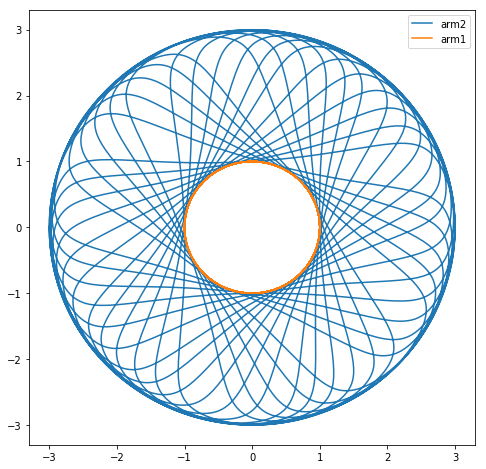

In [31]:
plt.figure(figsize=(8,8))
plt.plot(x2,y2)
plt.plot(x1,y1)
plt.legend(['arm2','arm1'])